In [21]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [44]:
#Load data set

train = pd.read_csv("train.csv")


In [45]:
#Checking Null Values

train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [46]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [47]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

In [49]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [50]:
train.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [51]:
#Check Unique Values

train['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [52]:
map = {'satisfied' : 1, 'neutral or dissatisfied' : 0}

train['satisfaction'] = train['satisfaction'].map(map)

In [53]:
#create dummy variable for Class feature

class_dummies = pd.get_dummies(train['Class'])
train  = pd.concat([train,class_dummies],axis=1)

In [54]:
train['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [55]:
map = {'Loyal Customer' : 1, 'disloyal Customer' : 0}

train['Customer Type'] = train['Customer Type'].map(map)

In [56]:
train['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [57]:
travel_type_dummies = pd.get_dummies(train['Type of Travel'])
train  = pd.concat([train,travel_type_dummies],axis=1)

In [58]:
map = {'Male' : 1, 'Female' : 0}

train['Gender'] = train['Gender'].map(map)

In [59]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus,Business travel,Personal Travel
0,0,70172,1,1,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,False,False,True,False,True
1,1,5047,1,0,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,True,False,False,True,False
2,2,110028,0,1,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,True,False,False,True,False
3,3,24026,0,1,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,True,False,False,True,False
4,4,119299,1,1,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,True,False,False,True,False


In [38]:
#Drop abandoned features after creating dummies

train = train.drop(columns=['Type of Travel','Class'], axis=1)

In [39]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus,Business travel,Personal Travel
0,0,70172,1,1,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,False,False,True,False,True
1,1,5047,1,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,True,False,False,True,False
2,2,110028,0,1,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,True,False,False,True,False
3,3,24026,0,1,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,True,False,False,True,False
4,4,119299,1,1,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,True,False,False,True,False


In [43]:
# Assuming 'filtered_data' is the DataFrame you want to save
file_path = r'C:\Users\Swastik Bhatnagar\raw_data.csv'  # Use raw string

# Save DataFrame to CSV
train.to_csv(file_path, index=False)  # Set index=False if you do not want to save the index
  # Set index=False if you do not want to save the index


In [20]:
#Fill null values using median

median_value = train['Arrival Delay in Minutes'].median()
train['Arrival Delay in Minutes'].fillna(median_value, inplace=True)

In [21]:
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].astype(int)

In [22]:
train.head()

,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus,Business travel,Personal Travel
0,1,1,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,0,False,False,True,False,True
1,1,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,0,True,False,False,True,False
2,0,1,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,1,True,False,False,True,False
3,0,1,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,0,True,False,False,True,False
4,1,1,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,1,True,False,False,True,False


In [23]:
train.dtypes

Gender                               int64
Customer Type                        int64
Age                                  int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
Departure Delay in Minutes           int64
Arrival Delay in Minutes             int32
satisfaction                         int64
Business                              bool
Eco                                   bool
Eco Plus   

<Axes: >

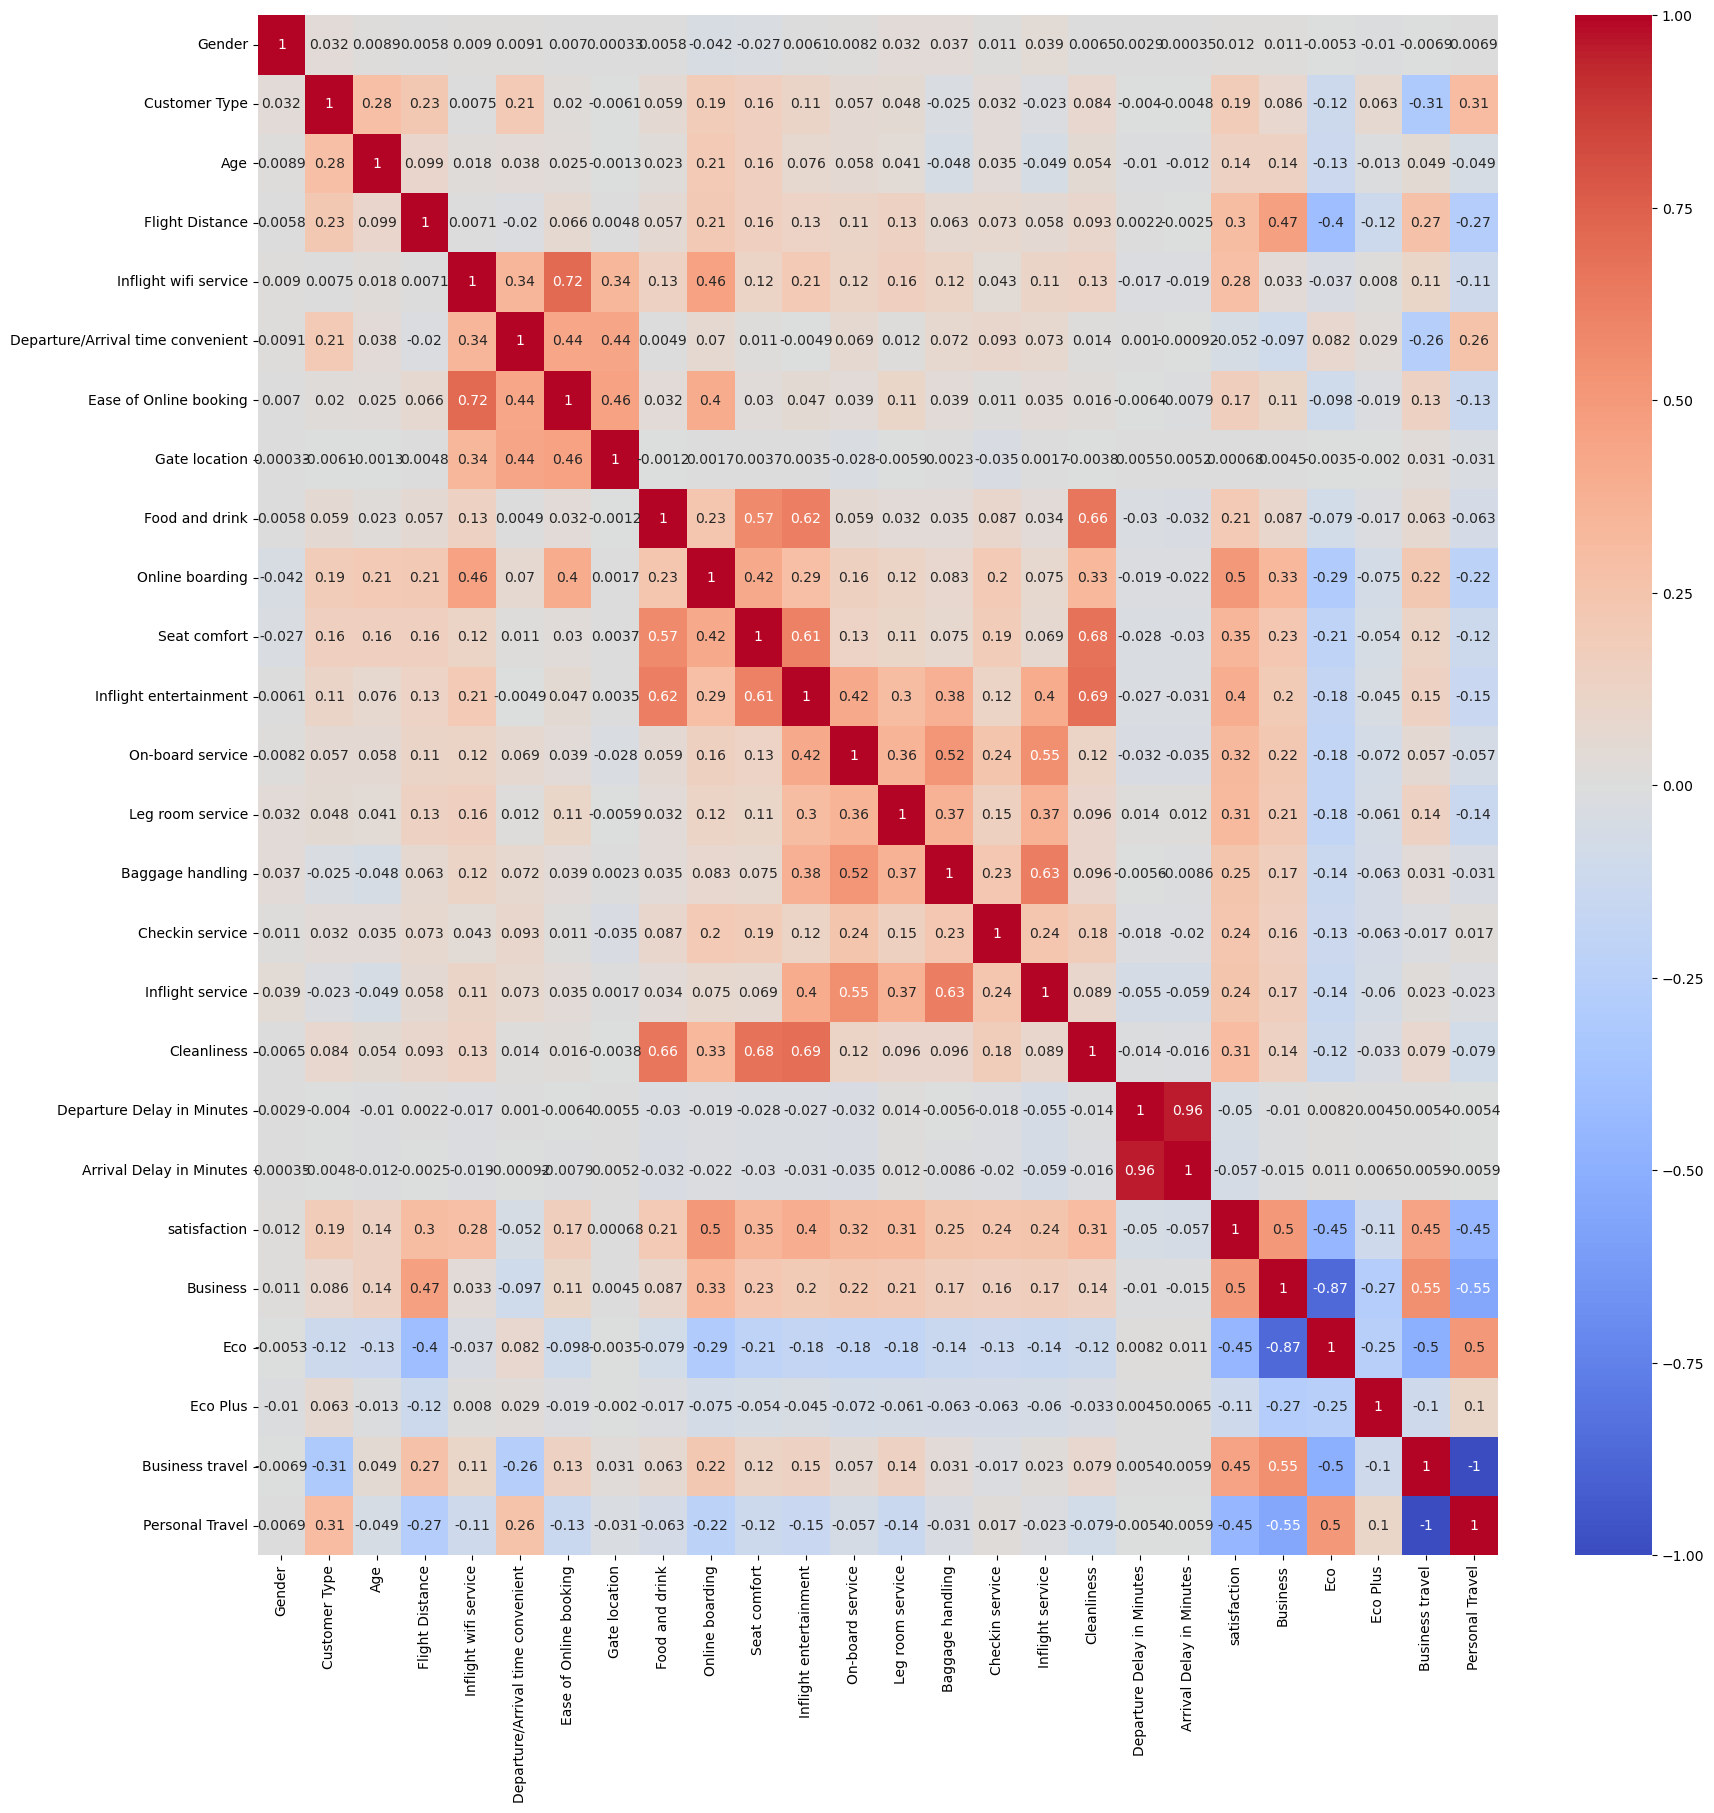

In [24]:
#Check co-relation between features using Heatmap

plt.figure(figsize = (20,20))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')

In [25]:
#Check co-relation with target variable

correlation_matrix = train.corr()
correlation_with_target = correlation_matrix['satisfaction'].abs().sort_values(ascending = False)

In [26]:
correlation_with_target

satisfaction                         1.000000
Business                             0.503848
Online boarding                      0.503557
Eco                                  0.451118
Personal Travel                      0.449000
Business travel                      0.449000
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Customer Type                        0.187638
Ease of Online booking               0.171705
Age                                  0.137167
Eco Plus                             0.105363
Arrival Delay in Minutes          

In [27]:
X_train = train.drop(columns =['satisfaction'])
y_train = train['satisfaction']

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf = RandomForestRegressor()

In [30]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending = False)

Online boarding                      0.362505
Inflight wifi service                0.177065
Personal Travel                      0.076473
Business travel                      0.070909
Inflight entertainment               0.047480
Customer Type                        0.039645
Checkin service                      0.028486
Flight Distance                      0.024642
Age                                  0.023027
Business                             0.019282
Gate location                        0.018413
Baggage handling                     0.017598
Seat comfort                         0.015236
Inflight service                     0.015094
Leg room service                     0.010992
Cleanliness                          0.009585
Arrival Delay in Minutes             0.009467
On-board service                     0.008940
Departure Delay in Minutes           0.007207
Departure/Arrival time convenient    0.005740
Food and drink                       0.004190
Ease of Online booking            

In [32]:
train.head()

,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus,Business travel,Personal Travel
0,1,1,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,0,False,False,True,False,True
1,1,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,0,True,False,False,True,False
2,0,1,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,1,True,False,False,True,False
3,0,1,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,0,True,False,False,True,False
4,1,1,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,1,True,False,False,True,False


In [35]:
#Check outliers 

Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter data excluding outliers
filtered_data = train[(train >= lower_bound) & (train <= upper_bound)]

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [36]:
# Assuming 'train' is your DataFrame and you want to apply the filter on all columns
# Calculate the IQR for each column
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for each column
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Create a boolean DataFrame where True indicates the value is within the bounds
within_bounds = (train >= lower_bound) & (train <= upper_bound)

# Filter data to only include rows where all values are within the bounds
filtered_data = train[within_bounds.all(axis=1)]


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [37]:
# Assuming 'train' is your DataFrame
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for each column
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Initialize a mask with all True values
mask = pd.Series([True]*len(train), index=train.index)

# Update the mask to False for any rows that are outside the bounds for each column
for col in train.columns:
    mask &= train[col].between(lower_bound[col], upper_bound[col], inclusive='both')

# Apply the mask to the DataFrame
filtered_data = train.loc[mask]


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [38]:
# Make sure train is a DataFrame with the relevant numerical columns only
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Initialize an empty mask with all True values (this will be our starting point)
mask = pd.Series(True, index=train.index)

# Now iterate over each column and update the mask
for col in train.columns:
    lower_bound = Q1[col] - (1.5 * IQR[col])
    upper_bound = Q3[col] + (1.5 * IQR[col])
    mask &= train[col].between(lower_bound, upper_bound)

# Apply the mask to the DataFrame
filtered_data = train[mask]

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [ ]:
filtered_data.shape

In [ ]:
train.shape

In [ ]:
train.to_csv('cleaned_data.csv', index=False)

In [ ]:
filtered_data = train[(train >= lower_bound) & (train <= upper_bound)]
